In [1]:
from google.colab import files
files.upload()

Saving datascience_salaries.csv to datascience_salaries (1).csv


{'datascience_salaries (1).csv': b",job_title,job_type,experience_level,location,salary_currency,salary\r\n0,Data scientist,Full Time,Senior,New York City,USD,149000\r\n2,Data scientist,Full Time,Senior,Boston,USD,120000\r\n3,Data scientist,Full Time,Senior,London,USD,68000\r\n4,Data scientist,Full Time,Senior,Boston,USD,120000\r\n5,Data scientist,Full Time,Senior,New York City,USD,149000\r\n6,Data scientist,Full Time,Senior,London,USD,68000\r\n7,Data scientist,Full Time,Senior,Research Triangle Park,USD,69000\r\n8,Data scientist,Full Time,Senior,Sydney,USD,68000\r\n9,Data scientist,Full Time,Senior,San Francisco,USD,140000\r\n10,Data scientist,Full Time,Senior,Sofia,USD,68000\r\n12,Data scientist,Full Time,Entry,BangPa-in,USD,35000\r\n15,Data scientist,Full Time,Senior,Berlin,USD,68000\r\n17,Data scientist,Full Time,Senior,NAMER,USD,68000\r\n18,Data scientist,Full Time,Senior,Remote,USD,68000\r\n20,Data scientist,Full Time,Senior,San Jose,USD,68000\r\n22,Data scientist,Full Time,Senio

In [7]:
#  Importing necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


df = pd.read_csv("datascience_salaries.csv")
df.shape

(1171, 7)

In [8]:
df.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


In [9]:
df.columns

Index(['Unnamed: 0', 'job_title', 'job_type', 'experience_level', 'location',
       'salary_currency', 'salary'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1171 non-null   int64 
 1   job_title         1171 non-null   object
 2   job_type          1171 non-null   object
 3   experience_level  1171 non-null   object
 4   location          1171 non-null   object
 5   salary_currency   1171 non-null   object
 6   salary            1171 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 64.2+ KB


In [12]:
df["salary_currency"].unique()

array(['USD', 'EUR', 'GBP'], dtype=object)

Before any data transformation, it is important to check for missing values and inspect the unique values in categorical columns. This helps us understand the dataset’s structure.

In [14]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check unique values in categorical columns
print("\nUnique job titles:\n", df['job_title'].unique())
print("\nUnique job titles:\n", df['job_type'].unique())
print("\nUnique experience levels:\n", df['experience_level'].unique())
print("\nUnique experience levels:\n", df['salary_currency'].unique())


Missing Values:
 Unnamed: 0          0
job_title           0
job_type            0
experience_level    0
location            0
salary_currency     0
salary              0
dtype: int64

Unique job titles:
 ['Data scientist' 'Data analyst' 'Big data' 'Machine learning' 'ML Ops']

Unique job titles:
 ['Full Time' 'Internship']

Unique experience levels:
 ['Senior' 'Entry' 'Mid' 'Executive']

Unique experience levels:
 ['USD' 'EUR' 'GBP']


In [16]:
df["location"].value_counts()

,count
location,
London,75
Remote,50
San Francisco,43
Bengaluru,34
Paris,33
...,...
Bogota,1
Kampala,1
Kirkland,1


*Encoding Categorical Features*

Since our dataset contains categorical variables, we need to apply One-Hot Encoding to convert them into numerical features.

In [19]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to encode
categorical_cols = ["job_title", "job_type", "experience_level", "location", "salary_currency"]

# Apply one-hot encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" to avoid multicollinearity
encoded_features = encoder.fit_transform(df[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Merge with original DataFrame (removing original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Display new DataFrame
df_encoded.head()


,Unnamed: 0,salary,job_title_Data analyst,job_title_Data scientist,job_title_ML Ops,job_title_Machine learning,job_type_Internship,experience_level_Executive,experience_level_Mid,experience_level_Senior,...,location_Wien,location_Wilmington,location_Work from Home,location_Wrocław,location_Zurich,location_tel aviv,location_České Budějovice,location_İstanbul,salary_currency_GBP,salary_currency_USD
0,0,149000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,68000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,120000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,149000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df_encoded.shape

(1171, 331)

*Applying PCA for Dimensionality Reduction*

We apply Principal Component Analysis (PCA) to reduce the dataset's dimensionality and visualize it after encoding categorical variables.

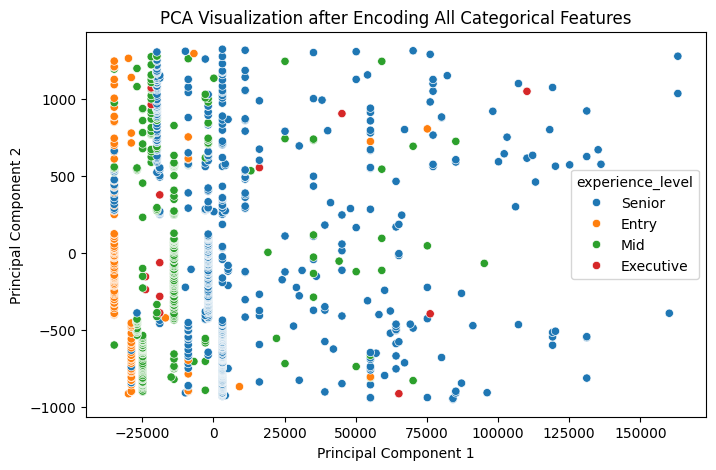

In [22]:
# Selecting only numerical columns for PCA
numerical_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df_encoded[numerical_cols])

# Add PCA results to DataFrame
df_encoded["PCA1"] = principal_components[:, 0]
df_encoded["PCA2"] = principal_components[:, 1]

# Visualize the results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_encoded["PCA1"], y=df_encoded["PCA2"], hue=df["experience_level"])
plt.title("PCA Visualization after Encoding All Categorical Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


nterpretation:

The plot reveals clear clustering patterns. Senior roles are widely spread across the space, indicating variability in salaries and job characteristics. In contrast, entry, mid-level, and executive positions form more distinct clusters, suggesting shared attributes within each group.

This distribution confirms that experience level impacts salary and job characteristics, and PCA has effectively captured these variations in two principal components.

*Explained Variance of PCA*

Now, we check how much variance is explained by the two principal components.

In [23]:
print(pca.explained_variance_ratio_)


[9.99604597e-01 3.95400870e-04]


Interpretation:

The first principal component (PCA1) explains 99.96% of the variance, meaning that nearly all the useful information in the dataset is captured by a single dimension. The second principal component (PCA2) only accounts for 0.04%, suggesting that it contributes very little additional information.

While this indicates that most of the structure in the data is captured in just one component, it does not necessarily mean that using only two components is the best choice. Adding a third or fourth component could help retain subtle variations that PCA1 alone does not capture.

To determine the optimal number of components, we should explore methods such as the explained variance plot (scree plot) to find the elbow point, or cumulative explained variance to ensure that we retain the maximum amount of information while reducing dimensionality efficiently.









In [26]:
# Grouping by 'experience_level' and calculating mean and median salary
salary_stats = df.groupby("experience_level")["salary"].agg(["mean", "median"])

import pandas as pd

# Grouping and calculating average and median salaries
salary_stats = df.groupby("experience_level")["salary"].agg(["mean", "median"])

# Display the DataFrame in Google Colab or Jupyter Notebook
print(salary_stats)


                          mean   median
experience_level                       
Entry             36111.111111  30000.0
Executive         76076.923077  46000.0
Mid               51786.885246  51000.0
Senior            75088.033012  68000.0


Interpretation:

This table allows us to observe salary progression based on experience level. By comparing mean and median, we can determine whether extreme salaries impact the average values.

